##  ANN (MLP)

1. Module and Environment set up
2. Data import and understanding
3. Missing value treatment
4. Feature transformation
5. MLP modelling and validation with different parameters

### Module and Environment

In [1]:
# Import Libraries required for the experiment
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import random
import os
import warnings
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
from sklearn import tree
import collections
np.random.seed(132)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [72]:
import sklearn
sklearn.__version__

'0.22.1'

In [2]:
# Initiate Encoders which will be used for Categorical Variables
label_encoder = LabelEncoder()

# Prints all line without skipping
pd.set_option('display.max_rows', None)
# Prints all columns without skipping
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


In [3]:
os.getcwd()

'C:\\Users\\ankit\\Teaching with Vijay\\Neural Network'

### Data Snapshot

In [4]:
# load the raw input dataset
bookings=pd.read_csv('C:\\Users\\ankit\\Teaching with Vijay\\Neural Network\\hotel_bookings.csv')
bookings.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03-07-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03-07-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,03-07-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,03-07-2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,06-05-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,22-04-2015


In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
bookings.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,21-10-2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN


In [7]:
bookings.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type            

In [8]:
#Assign Temporary Storage of the core dataset (For larger sets this step must be avoided)
temp = bookings.copy()

In [9]:
temp.columns[[3,5,6,13,22,23,29]]

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'country', 'agent', 'company',
       'reservation_status_date'],
      dtype='object')

In [10]:
temp=temp.drop(temp.columns[[3,5,6,13,22,23,29]],axis=1)


### Missing Value Treatment

In [11]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]

# Identify Categorical Variables manually
temp1=temp.head()
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]] = temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].astype(str)


In [12]:
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,customer_type,required_car_parking_spaces
0,Resort Hotel,0,July,0,0,Direct,Direct,0,0,3,No Deposit,Transient,0
1,Resort Hotel,0,July,0,0,Direct,Direct,0,0,4,No Deposit,Transient,0
2,Resort Hotel,0,July,0,1,Direct,Direct,0,0,0,No Deposit,Transient,0
3,Resort Hotel,0,July,0,1,Corporate,Corporate,0,0,0,No Deposit,Transient,0
4,Resort Hotel,0,July,0,2,Online TA,TA/TO,0,0,0,No Deposit,Transient,0


In [13]:
print(null_columns)

Index(['children'], dtype='object')


In [14]:
categoric_variables = temp1.columns[temp1.dtypes=='object']

# Categorical Imputation
for i in range(0,len(categoric_variables)):
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(np.nan,temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="NaN", value = temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="nan", value = temp[categoric_variables[i]].mode()[0])

    # Numeric Imputation
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Mean Imputation for Numeric Variables
numeric_variables = set(temp.columns) - set(categoric_variables)
i=1
for i in range(0,len(numeric_variables)):
    if(temp.columns[i] in numeric_variables):
       temp.iloc[:,[i]] = mean_imp.fit_transform(temp.iloc[:,[i]])
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="NaN",value =0)
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="nan",value =0)
       temp[temp.columns[i]].fillna(0, inplace = True) 


In [15]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
null_columns

Index([], dtype='object')

In [16]:
# Converting into string
temp['hotel'] = temp['hotel'].astype(str)
temp['arrival_date_month'] = temp['arrival_date_month'].astype(str)
temp['meal'] = temp['meal'].astype(str)
temp['market_segment'] = temp['market_segment'].astype(str)
temp['distribution_channel'] = temp['distribution_channel'].astype(str)
   
temp['is_repeated_guest'] = temp['is_repeated_guest'].astype(str)
temp['reserved_room_type'] = temp['reserved_room_type'].astype(str)
temp['deposit_type'] = temp['deposit_type'].astype(str)
temp['customer_type'] = temp['customer_type'].astype(str)
temp['is_canceled'] = temp['is_canceled'].astype(str)


## EDA

In [17]:
num_data = temp[temp.columns[temp.dtypes!='object']]
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342.0,0,0,2.0,0.0,0,0,0,3,0,0.0,0,0
1,737.0,0,0,2.0,0.0,0,0,0,4,0,0.0,0,0
2,7.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
3,13.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
4,14.0,0,2,2.0,0.0,0,0,0,0,0,98.0,0,1


### Feature Transformation

In [18]:
# Plotting All the Variables that are available in raw file
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\Boosting\\')
if not os.path.exists('Plots'):
    os.makedirs('Plots')
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\Boosting\\')


lead_time
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests


<Figure size 432x288 with 0 Axes>

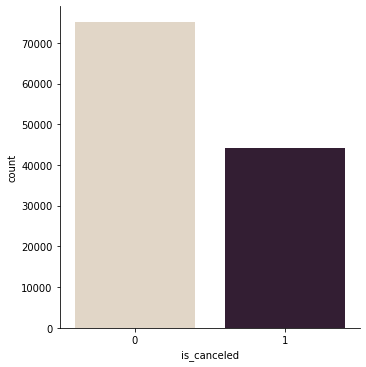

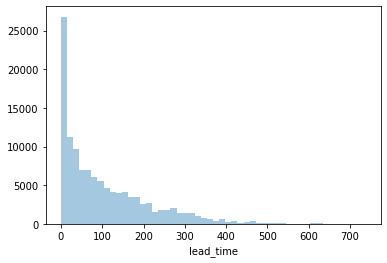

<Figure size 432x288 with 0 Axes>

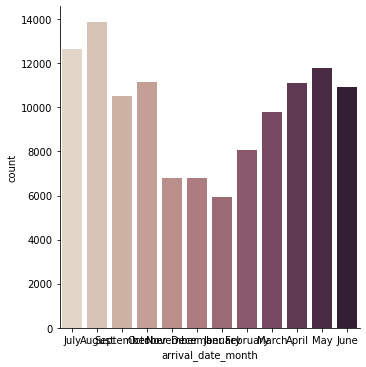

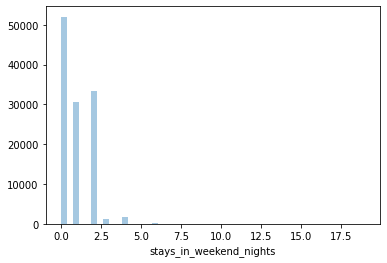

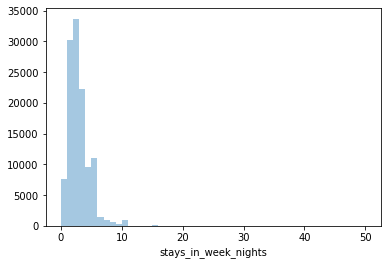

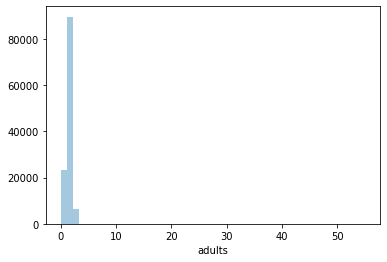

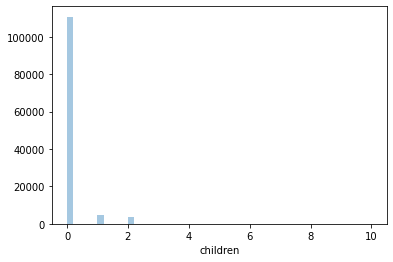

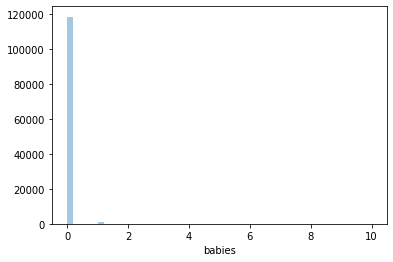

<Figure size 432x288 with 0 Axes>

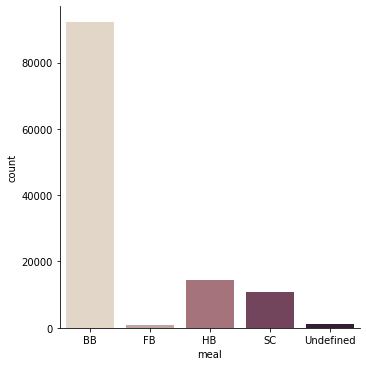

<Figure size 432x288 with 0 Axes>

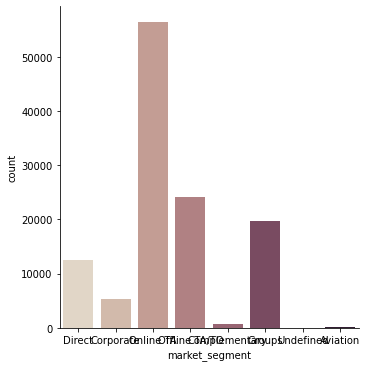

<Figure size 432x288 with 0 Axes>

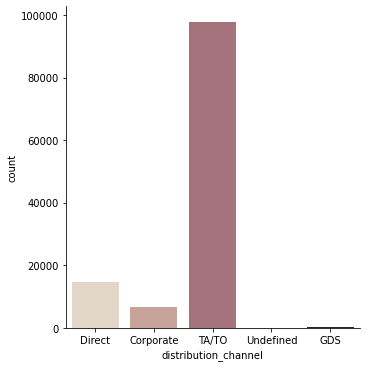

<Figure size 432x288 with 0 Axes>

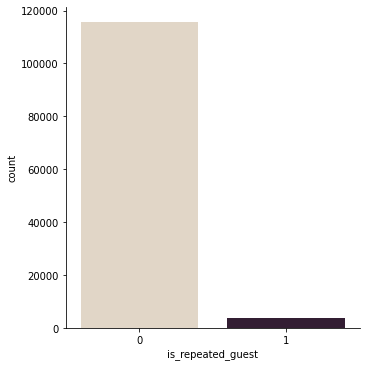

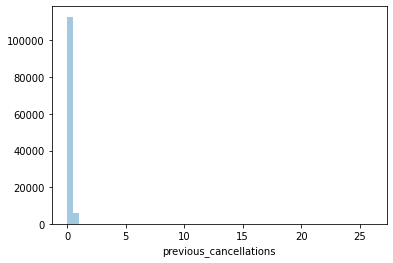

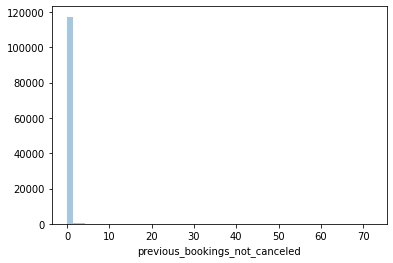

<Figure size 432x288 with 0 Axes>

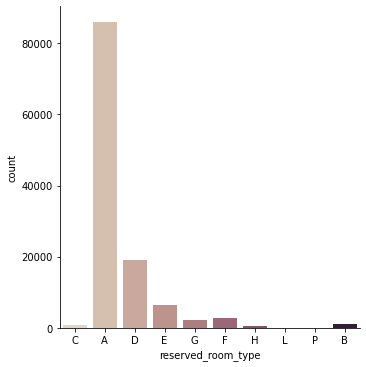

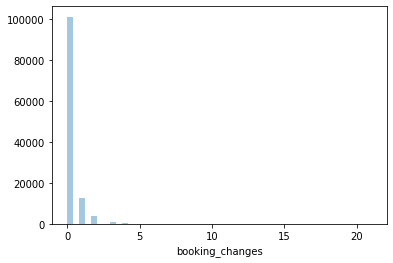

<Figure size 432x288 with 0 Axes>

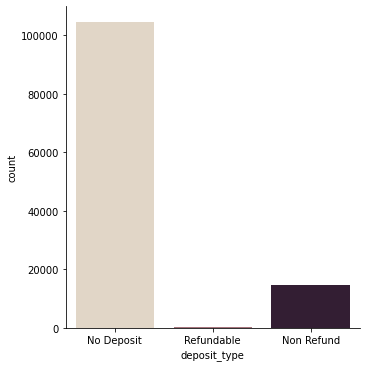

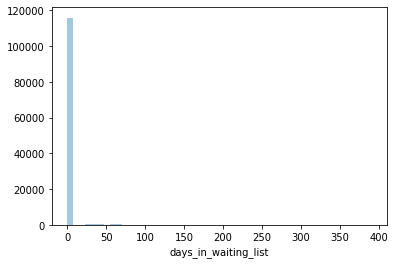

<Figure size 432x288 with 0 Axes>

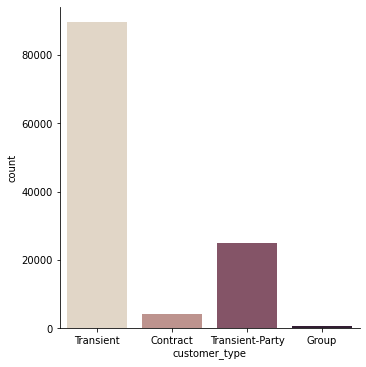

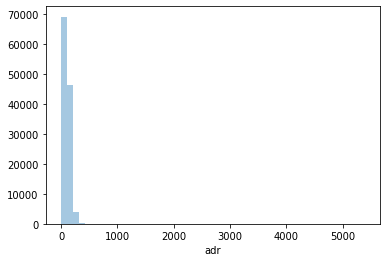

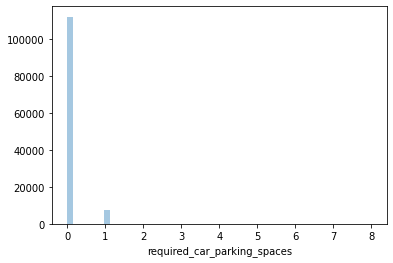

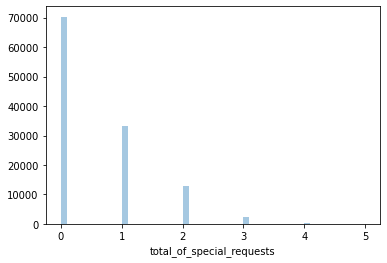

In [19]:

for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        print(temp.columns[i])
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')
    else:
        plt.figure()
        sns_plot = sns.catplot(x=temp.columns[i], kind="count", palette="ch:.25", data=temp)
        sns_plot.savefig(temp.columns[i]+'.png')




In [20]:
# Plotting All the Transformed Variables 
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\Boosting\\')
if not os.path.exists('Transformed Plots'):
    os.makedirs('Transformed Plots')
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\Boosting\\')



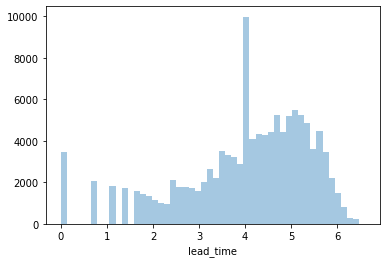

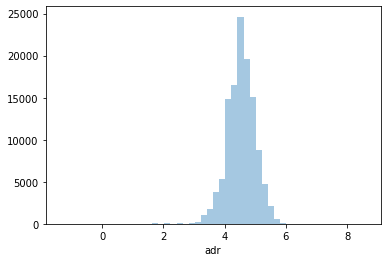

In [21]:
# Log transformation with mean Imputation for Non-Uniform Variables
log_mean_transform_var=['lead_time','adr']


import time
for i in range(0,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        logtransform=np.log(temp[temp.columns[i]])
        logtransform = logtransform.replace([np.inf, -np.inf], np.nan)
        logtransform = mean_imp.fit_transform(pd.DataFrame(logtransform))
        temp[temp.columns[i]]=logtransform
        temp[temp.columns[i]].fillna(0, inplace = True) 

for i in range(1,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')


### Feature Selection

#### Numerical feature selection

In [22]:
numeric_variables = num_data.columns
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [23]:
temp.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,3.994735,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,4.539002,0.062518,0.571363
std,1.429553,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,0.462198,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.347074,0.000000,0.000000
25%,3.295837,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.265914,0.000000,0.000000
50%,4.234107,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.549393,0.000000,0.000000
75%,5.075174,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.836282,0.000000,1.000000
max,6.602588,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,8.594154,8.000000,5.000000


In [24]:
# Create correlation matrix
corr_matrix = temp[numeric_variables].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7 & less than -0.7
to_drop_pos = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_neg = [column for column in upper.columns if any(upper[column] < -0.7)]
print(to_drop_neg)
print(to_drop_pos)

[]
[]


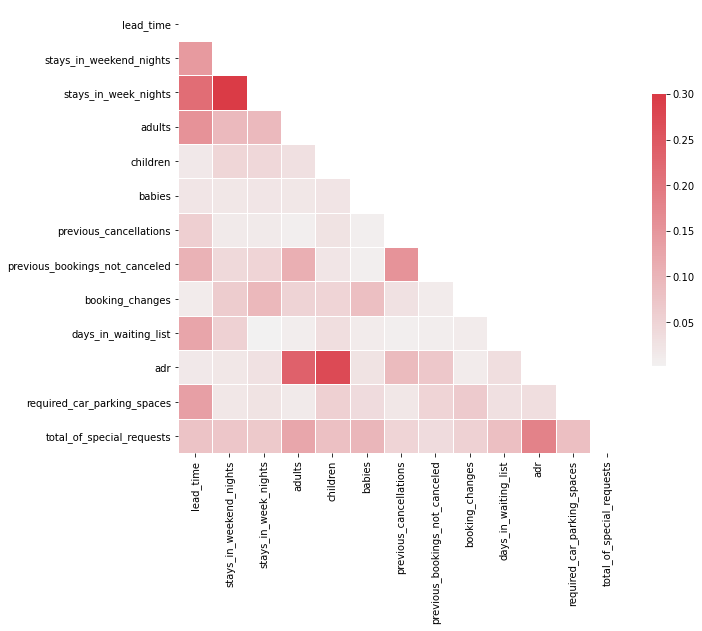

In [25]:
plt.figure(figsize=(10,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns_plot.figure.savefig('correlation.png')
# Fill na values with Numeric value as 0
for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        temp[temp.columns[i]].fillna(0, inplace = True) 


In [26]:
# Drop NaN Value from the temp variable
        
temp=temp.dropna(how='any') 

X = temp.drop(temp.columns[1],axis=1)
y = temp[temp.columns[1]]
y =np.where(y =='0',0,1)
# Identify Numeric Values separately
#num_only=set(numeric_variables).difference(categoric_variables)

In [27]:
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [28]:

# Decision tree with gini 
dt_model_num = DecisionTreeClassifier() 
  
# Performing training 
dt_model_num.fit(X[numeric_variables], y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
print(dt_model_num.feature_importances_)

[0.31377605 0.04705926 0.08419545 0.02802842 0.01361105 0.00163069
 0.07693982 0.01695888 0.04333481 0.0101143  0.27552245 0.0229107
 0.06591812]


In [30]:
dt_p_values_num = pd.Series(dt_model_num.feature_importances_,index = X[numeric_variables].columns)
dt_p_values_num.sort_values(ascending = False , inplace = True)
dt_p_values_num

lead_time                         0.313776
adr                               0.275522
stays_in_week_nights              0.084195
previous_cancellations            0.076940
total_of_special_requests         0.065918
stays_in_weekend_nights           0.047059
booking_changes                   0.043335
adults                            0.028028
required_car_parking_spaces       0.022911
previous_bookings_not_canceled    0.016959
children                          0.013611
days_in_waiting_list              0.010114
babies                            0.001631
dtype: float64

{'babies'}


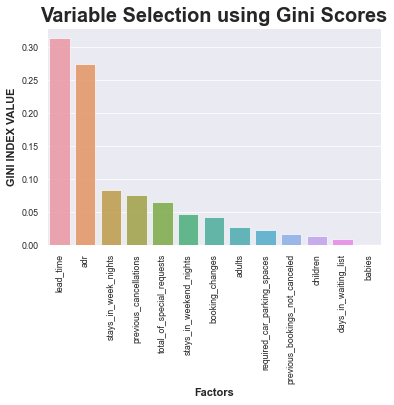

In [31]:

plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_num.index[dt_p_values_num>0],dt_p_values_num[dt_p_values_num>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 11, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 11, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX'+'.png')

dt_selected_num=dt_p_values_num.index[dt_p_values_num>0.01]
dt_rejected_num=set(X[numeric_variables].columns.values).difference(dt_selected_num)
print(dt_rejected_num)

#### categorical feature selection

list of categorical variables to be dropped Index([], dtype='object')


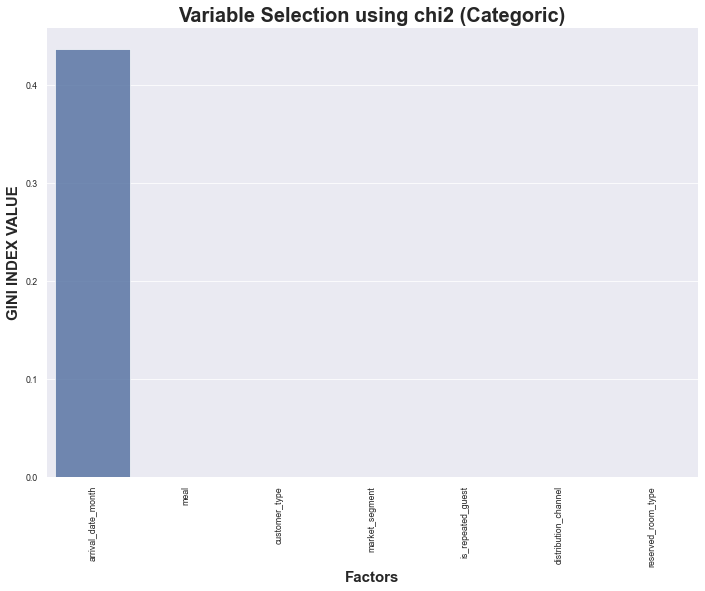

In [32]:
#temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]] = temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]].astype('str')

# Selecting Categorical Variables alone for Variable Selection
t=temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]]
# Dropping off NaN Values if Any
t=t.dropna(how='any')
del t['is_canceled']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(0,len(t.columns)):
    t.iloc[:,i] = le.fit_transform(t.iloc[:,i])
    
from sklearn.feature_selection import chi2
Stats,Pvalue = chi2(t,y)
dt_p_values_cat = pd.Series(Pvalue,index = t.columns)
dt_p_values_cat.sort_values(ascending = False , inplace = True)
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_cat.index[dt_p_values_cat>0],dt_p_values_cat[dt_p_values_cat>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 15, weight = 'bold')
sns_plot.set_title("Variable Selection using chi2 (Categoric)", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('chi2'+'.png')

dt_selected_cat=dt_p_values_cat.index[:10]
dt_rejected_cat=dt_p_values_cat.index[10:]
print("list of categorical variables to be dropped", dt_rejected_cat)


In [33]:
rejected_variables=[]
rejected_variables.extend(to_drop_pos)
rejected_variables.extend(to_drop_neg)
rejected_variables.extend(dt_rejected_num)
rejected_variables.extend(dt_rejected_cat)


In [34]:
rejected_variables

['babies']

In [35]:
print(set(temp.columns).difference(rejected_variables))

final_selection=set(temp.columns).difference(rejected_variables)
final_selection.remove('is_canceled')

#cat_vars=set(set(final_selection).difference(rejected_variables_filter)).difference(numeric_variables)
#cat_vars1=cat_vars
#final_selection=set(final_selection).difference(cat_vars1)


{'deposit_type', 'stays_in_week_nights', 'hotel', 'is_repeated_guest', 'previous_bookings_not_canceled', 'distribution_channel', 'total_of_special_requests', 'is_canceled', 'stays_in_weekend_nights', 'adr', 'lead_time', 'arrival_date_month', 'required_car_parking_spaces', 'customer_type', 'market_segment', 'booking_changes', 'days_in_waiting_list', 'reserved_room_type', 'meal', 'children', 'adults', 'previous_cancellations'}


In [36]:
temp[final_selection].head()

,deposit_type,stays_in_week_nights,hotel,is_repeated_guest,previous_bookings_not_canceled,distribution_channel,total_of_special_requests,stays_in_weekend_nights,adr,lead_time,arrival_date_month,required_car_parking_spaces,customer_type,market_segment,booking_changes,days_in_waiting_list,reserved_room_type,meal,children,adults,previous_cancellations
0,No Deposit,0,Resort Hotel,0,0,Direct,0,0,4.539002,5.834811,July,0,Transient,Direct,3,0,C,BB,0.0,2.0,0
1,No Deposit,0,Resort Hotel,0,0,Direct,0,0,4.539002,6.602588,July,0,Transient,Direct,4,0,C,BB,0.0,2.0,0
2,No Deposit,1,Resort Hotel,0,0,Direct,0,0,4.317488,1.945910,July,0,Transient,Direct,0,0,A,BB,0.0,1.0,0
3,No Deposit,1,Resort Hotel,0,0,Corporate,0,0,4.317488,2.564949,July,0,Transient,Corporate,0,0,A,BB,0.0,1.0,0
4,No Deposit,2,Resort Hotel,0,0,TA/TO,1,0,4.584967,2.639057,July,0,Transient,Online TA,0,0,A,BB,0.0,2.0,0


In [37]:
temp[final_selection].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   deposit_type                    119390 non-null  object 
 1   stays_in_week_nights            119390 non-null  int64  
 2   hotel                           119390 non-null  object 
 3   is_repeated_guest               119390 non-null  object 
 4   previous_bookings_not_canceled  119390 non-null  int64  
 5   distribution_channel            119390 non-null  object 
 6   total_of_special_requests       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   adr                             119390 non-null  float64
 9   lead_time                       119390 non-null  float64
 10  arrival_date_month              119390 non-null  object 
 11  required_car_parking_spaces     119390 non-null  int64  
 12  customer_type   

#### One Hot Encoding

In [38]:
num_data = temp[temp.columns[temp.dtypes!='object']]
cat_data = temp[temp.columns[temp.dtypes=='object']]
del cat_data['is_canceled']

In [39]:
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,4.539002,0,0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,4.539002,0,0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,4.584967,0,1


In [40]:
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,0,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,0,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,0,A,No Deposit,Transient


In [41]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)
dummydata = enc.fit_transform(cat_data)
dummydata = pd.DataFrame(dummydata)
names = enc.get_feature_names(input_features=list(cat_data.columns))
dummydata.columns = names
dummydata.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
dummydata=dummydata.reset_index(drop=True)
num_data=num_data.reset_index(drop=True)
X_log=pd.concat([num_data,dummydata], axis=1)


In [43]:
X_log.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,4.539002,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,4.539002,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,4.584967,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Modelling and Validation  MLP

In [44]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)

In [45]:
from sklearn.neural_network import MLPClassifier

In [50]:
## default LR = 0.001

In [49]:
%%time
#Training the model on the train data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 10), batch_size = 100,  max_iter=10,verbose=2,random_state=42,solver='sgd')
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.61772699
Iteration 2, loss = 0.50915457
Iteration 3, loss = 0.46216153
Iteration 4, loss = 0.44632543
Iteration 5, loss = 0.43890931
Iteration 6, loss = 0.43453751
Iteration 7, loss = 0.43160036
Iteration 8, loss = 0.43043259
Iteration 9, loss = 0.42906142
Iteration 10, loss = 0.42762887
Wall time: 9.6 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [56]:
%%time
#Training the model on the train data
from sklearn.neural_network import MLPClassifier #Small learning rates consume a lot of time to converge or will not be able to converge because of the vanishing gradient
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 10), max_iter=10,verbose=2, batch_size = 100,learning_rate_init=0.0001,random_state=42,solver='sgd')
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.67354815
Iteration 2, loss = 0.65105058
Iteration 3, loss = 0.64125003
Iteration 4, loss = 0.63156810
Iteration 5, loss = 0.62115065
Iteration 6, loss = 0.61003193
Iteration 7, loss = 0.59862873
Iteration 8, loss = 0.58711924
Iteration 9, loss = 0.57495595
Iteration 10, loss = 0.56236692
Wall time: 9.33 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15, 10), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [57]:
%%time
#Training the model on the train data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 10), max_iter=10, batch_size = 79991,verbose=2,learning_rate_init=0.01,random_state=42)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.72984678
Iteration 2, loss = 0.69357746
Iteration 3, loss = 0.66816956
Iteration 4, loss = 0.64671851
Iteration 5, loss = 0.63068559
Iteration 6, loss = 0.61829155
Iteration 7, loss = 0.60580517
Iteration 8, loss = 0.59291341
Iteration 9, loss = 0.58044379
Iteration 10, loss = 0.56826755
Wall time: 2.96 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size=79991, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15, 10), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [59]:
%%time
#Training the model on the train data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 10), max_iter=12,verbose=2,learning_rate_init=0.1,random_state=42) #choosing high learning rate for this perticular data
mlp.fit(X_train, y_train) 
#Large learning rates puts the model at risk of overshooting the minima so it will not be able to converge: what is known as exploding gradient

Iteration 1, loss = 0.46658067
Iteration 2, loss = 0.45361845
Iteration 3, loss = 0.44604162
Iteration 4, loss = 0.47513668
Iteration 5, loss = 0.46663422
Iteration 6, loss = 0.45716708
Iteration 7, loss = 0.43818208
Iteration 8, loss = 0.44025321
Iteration 9, loss = 0.46043728
Iteration 10, loss = 0.46190379
Iteration 11, loss = 0.44780287
Iteration 12, loss = 0.43803871
Wall time: 7.4 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15, 10), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=12, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [60]:
%%time
#Training the model on the train data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 10), max_iter=12,verbose=2,learning_rate_init=0.001,random_state=42) #choosing high learning rate for this perticular data
mlp.fit(X_train, y_train) 
#Large learning rates puts the model at risk of overshooting the minima so it will not be able to converge: what is known as exploding gradient

Iteration 1, loss = 0.51793549
Iteration 2, loss = 0.42954102
Iteration 3, loss = 0.41996121
Iteration 4, loss = 0.41556350
Iteration 5, loss = 0.41089214
Iteration 6, loss = 0.40812131
Iteration 7, loss = 0.40631553
Iteration 8, loss = 0.40497392
Iteration 9, loss = 0.40241079
Iteration 10, loss = 0.40203599
Iteration 11, loss = 0.40096493
Iteration 12, loss = 0.39957354
Wall time: 8.18 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=12,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [61]:
%%time
#Predict the response for train dataset
y_pred_train = mlp.predict(X_train)
#Predict the response for test dataset
y_pred_test= mlp.predict(X_test)


Wall time: 236 ms


In [62]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.80      0.94      0.86     50481
           1       0.85      0.60      0.70     29510

    accuracy                           0.81     79991
   macro avg       0.83      0.77      0.78     79991
weighted avg       0.82      0.81      0.80     79991



In [63]:
print( "Classification report test data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report test data

               precision    recall  f1-score   support

           0       0.80      0.94      0.86     24685
           1       0.86      0.60      0.70     14714

    accuracy                           0.81     39399
   macro avg       0.83      0.77      0.78     39399
weighted avg       0.82      0.81      0.80     39399

--------------------accuracy score--------------


0.8128378892865301

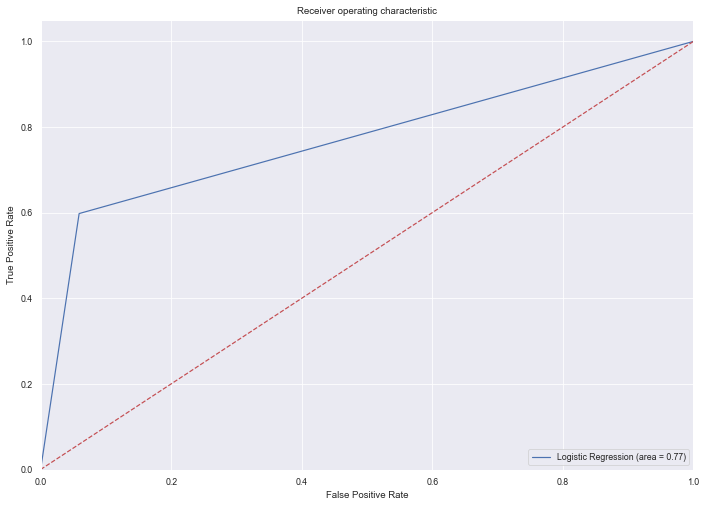

In [64]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Modelling and Validation  More than 1 MLP parameters

In [65]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)


In [66]:
%%time
from sklearn.model_selection import cross_validate
# Let's first try a simple model to make a benchmark for our model performance
scoring = ['precision_macro','recall_macro','accuracy']
depth1 = pd.DataFrame(columns = ['test_accuracy','test_precision_macro','test_recall_macro','learning_rate','epoch'])
epoch = [5,7] # for demo use less number of epochs
learning_rate=[0.002,0.001] # for demo use less number of learning rates
for k in epoch:
    for j in learning_rate:
        mlp = MLPClassifier(max_iter=k,random_state=1,learning_rate_init=j)
        scores = cross_validate(estimator = mlp,X=X_train, y=y_train,cv=3,scoring=scoring)
        a = pd.DataFrame(scores)
        a = a[['test_accuracy','test_precision_macro','test_recall_macro']]
        a['epoch']=k
        a['learning_rate']=j
        depth1 = pd.concat([a,depth1],axis=0)
depth1[['learning_rate','epoch','test_accuracy','test_precision_macro','test_recall_macro']][depth1['test_accuracy'] ==depth1['test_accuracy'].max()] 



Wall time: 44.4 s


,learning_rate,epoch,test_accuracy,test_precision_macro,test_recall_macro
1,0.002,7,0.817882,0.832963,0.772834


In [67]:
# Create MLP classifer object
mlp = MLPClassifier(max_iter=7,random_state=1,learning_rate_init=0.002)
# Fit the random search model
mlp.fit(X_train,y_train)
y_pred_test = mlp.predict(X_test)


In [68]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[23196  1489]
 [ 5714  9000]] 

true negative 23196
false positive 1489
false negative 5714
true positive 9000


In [69]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.80      0.94      0.87     24685
           1       0.86      0.61      0.71     14714

    accuracy                           0.82     39399
   macro avg       0.83      0.78      0.79     39399
weighted avg       0.82      0.82      0.81     39399

--------------------accuracy score--------------


0.8171781009670296

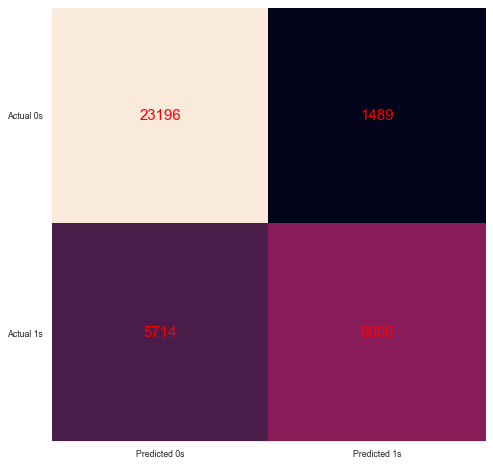

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='red', fontsize=15)
plt.show()

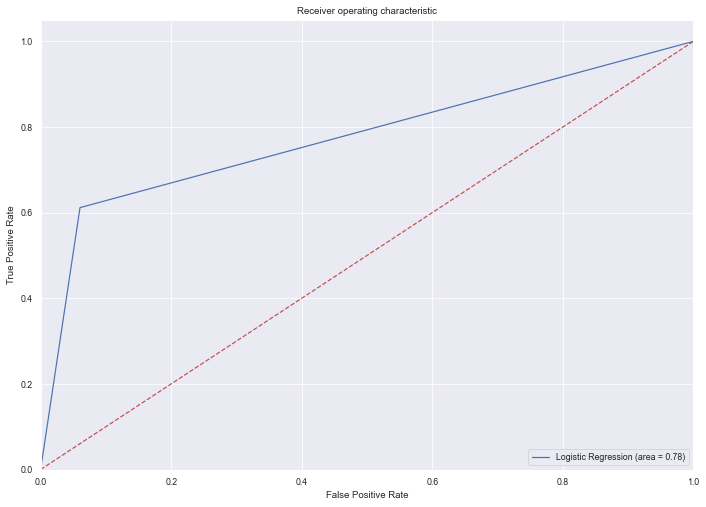

In [71]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()